In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [68]:
#Q1
#Import data
df=pd.read_csv(r'C:\Users\Chenyi\Desktop\LR\hw1\copier_maintenance.txt',delim_whitespace = True)
df

,minutes,copiers
0,20,2
1,60,4
2,46,3
3,41,2
4,12,1
5,137,10
6,68,5
7,89,5
8,4,1
9,32,2


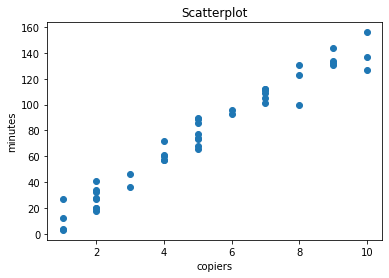

In [69]:
#Q1.a
minute=df.loc[:,'minutes'].values #transform series into array
copier=df.loc[:,'copiers'].values

plt.scatter(copier,minute)
plt.xlabel('copiers')
plt.ylabel('minutes')
plt.title('Scatterplot')
plt.show()

beta1:[[15.03524804]], beta0: [-0.58015666]


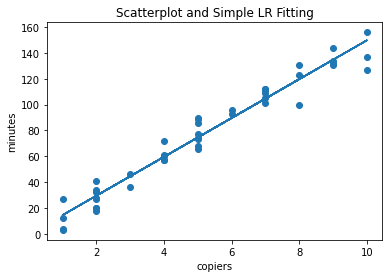

R-square is 0.9574954834790799


In [70]:
#Q1.b
#set up the LR model
regressor = LinearRegression()
regressor=regressor.fit(copier.reshape(-1, 1),minute.reshape(-1, 1))
print('beta1:'+str(regressor.coef_)+", beta0: "+str(regressor.intercept_))

#draw the fitiing line
plt.scatter(copier,minute)
plt.xlabel('copiers')
plt.ylabel('minutes')
plt.title('Scatterplot and Simple LR Fitting')
plt.plot(copier,regressor.predict(copier.reshape(-1, 1)))
plt.show()

#evaluate the fitting
print('R-square is '+str(regressor.score(copier.reshape(-1, 1),minute.reshape(-1, 1))))

In [71]:
#Q1.e
regressor.predict(np.array([5]).reshape(-1, 1))

array([[74.59608355]])

In [72]:
#Q1.f
res=minute-regressor.intercept_-copier*regressor.coef_
print(res)
print("The sum of the residuals is "+str(np.sum(res)))

[[ -9.49033943   0.43916449   1.47441253  11.50966057  -2.45509138
  -12.77232376  -6.59608355  14.40391645 -10.45509138   2.50966057
    9.26292428   6.22767624   3.36866841  -8.52558747  12.43916449
  -19.70182768   0.33342037  11.29817232 -22.77232376  -2.56083551
   -8.59608355  -3.66657963   4.33342037  -0.59608355  -0.73707572
    7.33342037 -11.49033943  -1.59608355   6.33342037   6.36866841
    3.29817232  15.40391645  -9.49033943  -1.49033943 -11.45509138
   -2.56083551  11.40391645  -2.73707572   7.33342037  12.54490862
   -3.73707572   4.50966057  -2.49033943   1.43916449   2.40391645]]
The sum of the residuals is -1.6697754290362354e-13


In [73]:
#Q2
#Import data
df2=pd.read_csv(r'C:\Users\Chenyi\Desktop\LR\hw1\SENIC.txt',delim_whitespace = True)
df2

,ID,Stay,Age,Risk,Cult,Xray,Beds,MS,Reg,Cen,Nurses,AFS
0,1,7.13,55.7,4.1,9.0,39.6,279,2,4,207,241,60.0
1,2,8.82,58.2,1.6,3.8,51.7,80,2,2,51,52,40.0
2,3,8.34,56.9,2.7,8.1,74.0,107,2,3,82,54,20.0
3,4,8.95,53.7,5.6,18.9,122.8,147,2,4,53,148,40.0
4,5,11.20,56.5,5.7,34.5,88.9,180,2,1,134,151,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
108,109,11.80,53.8,5.7,9.1,116.9,571,1,2,441,469,62.9
109,110,9.50,49.3,5.8,42.0,70.9,98,2,3,68,46,22.9
110,111,7.70,56.9,4.4,12.2,67.9,129,2,4,85,136,62.9
111,112,17.94,56.2,5.9,26.4,91.8,835,1,1,791,407,62.9


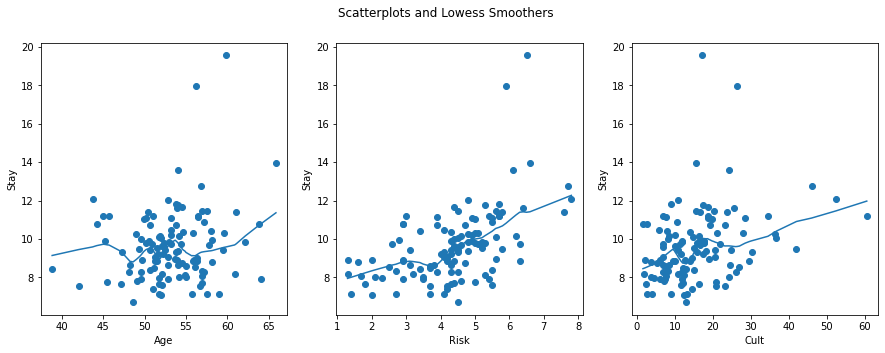

In [92]:
#Q2.a
import statsmodels.api as sm
lowess = sm.nonparametric.lowess

y=df2.loc[:,'Stay'].values
plt.figure(figsize=(15,5))
for i in range(3):
    x=df2.iloc[:,i+2].values
    plt.subplot(1,3,i+1)
    plt.xlabel(str(df2.keys()[i+2]))
    plt.ylabel('Stay')
    plt.scatter(x,y)
    #lowess smoothers
    yest = lowess(y, x, frac=1/3)[:,1]#The second column of the return is the smoothed data
    plt.plot(np.sort(x),yest)
    
plt.suptitle('Scatterplots and Lowess Smoothers')    
plt.show()

For Age, beta1:[[0.08093512]], beta0: [5.33999148]
R-square is 0.03568848881351605
For Risk, beta1:[[0.76042089]], beta0: [6.33678654]
R-square is 0.284562320773181
For Cult, beta1:[[0.06101218]], beta0: [8.6847581]
R-square is 0.10672233273246046


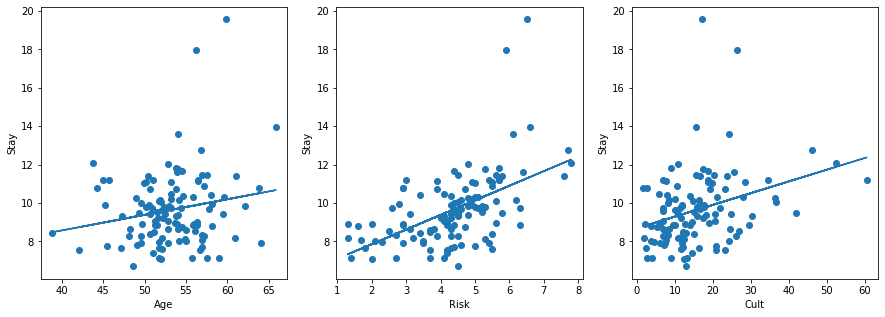

In [75]:
#2b
plt.figure(figsize=(15,5))
for i in range(3):
    #scatterplot
    x=df2.iloc[:,i+2].values
    plt.subplot(1,3,i+1)
    plt.xlabel(str(df2.keys()[i+2]))
    plt.ylabel('Stay')
    plt.scatter(x,y)
    #construct the regression model 
    regressor = LinearRegression()
    regressor=regressor.fit(x.reshape(-1, 1),y.reshape(-1, 1))
    print('For '+str(df2.keys()[i+2])+', beta1:'+str(regressor.coef_)+", beta0: "+str(regressor.intercept_))
    print('R-square is '+str(regressor.score(x.reshape(-1, 1),y.reshape(-1, 1))))
    #draw the fitiing line
    plt.plot(x,regressor.predict(x.reshape(-1, 1)))

In [76]:
#2c
for i in range(3):
    x=df2.iloc[:,i+2].values
    regressor = LinearRegression()
    regressor=regressor.fit(x.reshape(-1, 1),y.reshape(-1, 1))
    y_hat=regressor.predict(x.reshape(-1,1)).reshape(len(y_hat),)
    MSE=sum((y-y_hat)**2)/(len(x)-2)
    print('For '+str(df2.keys()[i+2])+', MSE is '+str(MSE))


For Age, MSE is 3.5550115355226932
For Risk, MSE is 2.637518242906336
For Cult, MSE is 3.2931395868681994


(113,)